In [1]:
import pandas as pd
import numpy as np
import math
import os
from test_class import Test
os.environ['PYTHONHASHSEED'] = str(50)
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
def bin_append(set_ree, count, pset_size):
    intersect_val = 1
    subset = []

    while(intersect_val < pset_size):
        if count & intersect_val:
            index = int(math.log(intersect_val, 2))
            subset.append(set_ree[index])
        
        intersect_val *= 2

    return subset

def gen_power_set(set_ree):
    power = []
    count = 0

    pset_size = int(2 ** len(set_ree))

    for i in range(pset_size):
        power.append(bin_append(set_ree, count, pset_size))
        count = count + 1

    power.sort(key = lambda x : len(x))
    return power

In [3]:
rounds = 50
dataset = pd.read_csv('RTT_data.csv')
data_args = {
    'data seed': 11,
    'distance clients': [0, 2, 3, 6],
    'distance augments': [0.5, 0.5, 0.5, 0.5],
    'tolerance': 5,
    'exclude dtypes': 'object',
    'drop labels': ['GroundTruthRange[m]'],
    'target labels': ['GroundTruthRange[m]'],
    'test size 1': 0.2,
    'test size 2': 0.25
}

Mt = (np.ones(rounds) * 5).astype('int32')
model_seed = 50
test = Test(dataset, data_args, Mt, model_seed)

In [4]:
test.split(scheme = 1)
test.display_metadata()

Number of samples: 29581
Features per sample: 10

Columns:
%Timestamp[s], GroundTruthPositionX[m], GroundTruthPositionY[m], GroundTruthPositionZ[m], ML_range_estimate[m], AP_positionX[m], AP_positionY[m], AP_positionZ[m], AP_index, ToD_factor[m]

Clients: 10
Total Client Training Samples: 17748 (60.00%)
Total Client Training Labels: 17748
Total Validation Samples: 5917 (20.00%)
Total Validation Labels: 5917
Total Test Samples: 5916 (20.00%)
Total Test Labels: 5916


In [5]:
test.display_client_distribution()

Data Distribution
Client 1: 1.27%
Client 2: 0.67%
Client 3: 16.08%
Client 4: 23.99%
Client 5: 4.30%
Client 6: 2.22%
Client 7: 0.19%
Client 8: 23.76%
Client 9: 21.69%
Client 10: 5.82%

Distance Distribution w.r.t. Max Distance
Client 1: 68.42%
Client 2: 1.13%
Client 3: 84.83%
Client 4: 100.00%
Client 5: 24.36%
Client 6: 28.14%
Client 7: 58.71%
Client 8: 28.25%
Client 9: 54.60%
Client 10: 49.32%


In [6]:
w, b, fedavg_test_mse, fedavg_log = test.run_fedavg_test(rounds = rounds, frac_clients = 0.5)
log_path = 'history/important baselines/fedavg_log_5_scheme1.npy'
test_path = 'history/important baselines/fedavg_test_mse_5_scheme1.npy'
np.save(log_path, fedavg_log)
np.save(test_path, fedavg_test_mse)
test.load_baseline_fedavg_data(test_path, log_path)

Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50


In [7]:
a_search = np.logspace(-3, 3, 7)
l_search = np.logspace(-3, 3, 7)
test.confeddi_gs(a_search, l_search, rounds = rounds)

Training Model 1
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 2
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 3
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 4
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 5
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 6
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 7
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 8
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 9
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 10
Round 5
Round 10
Ro

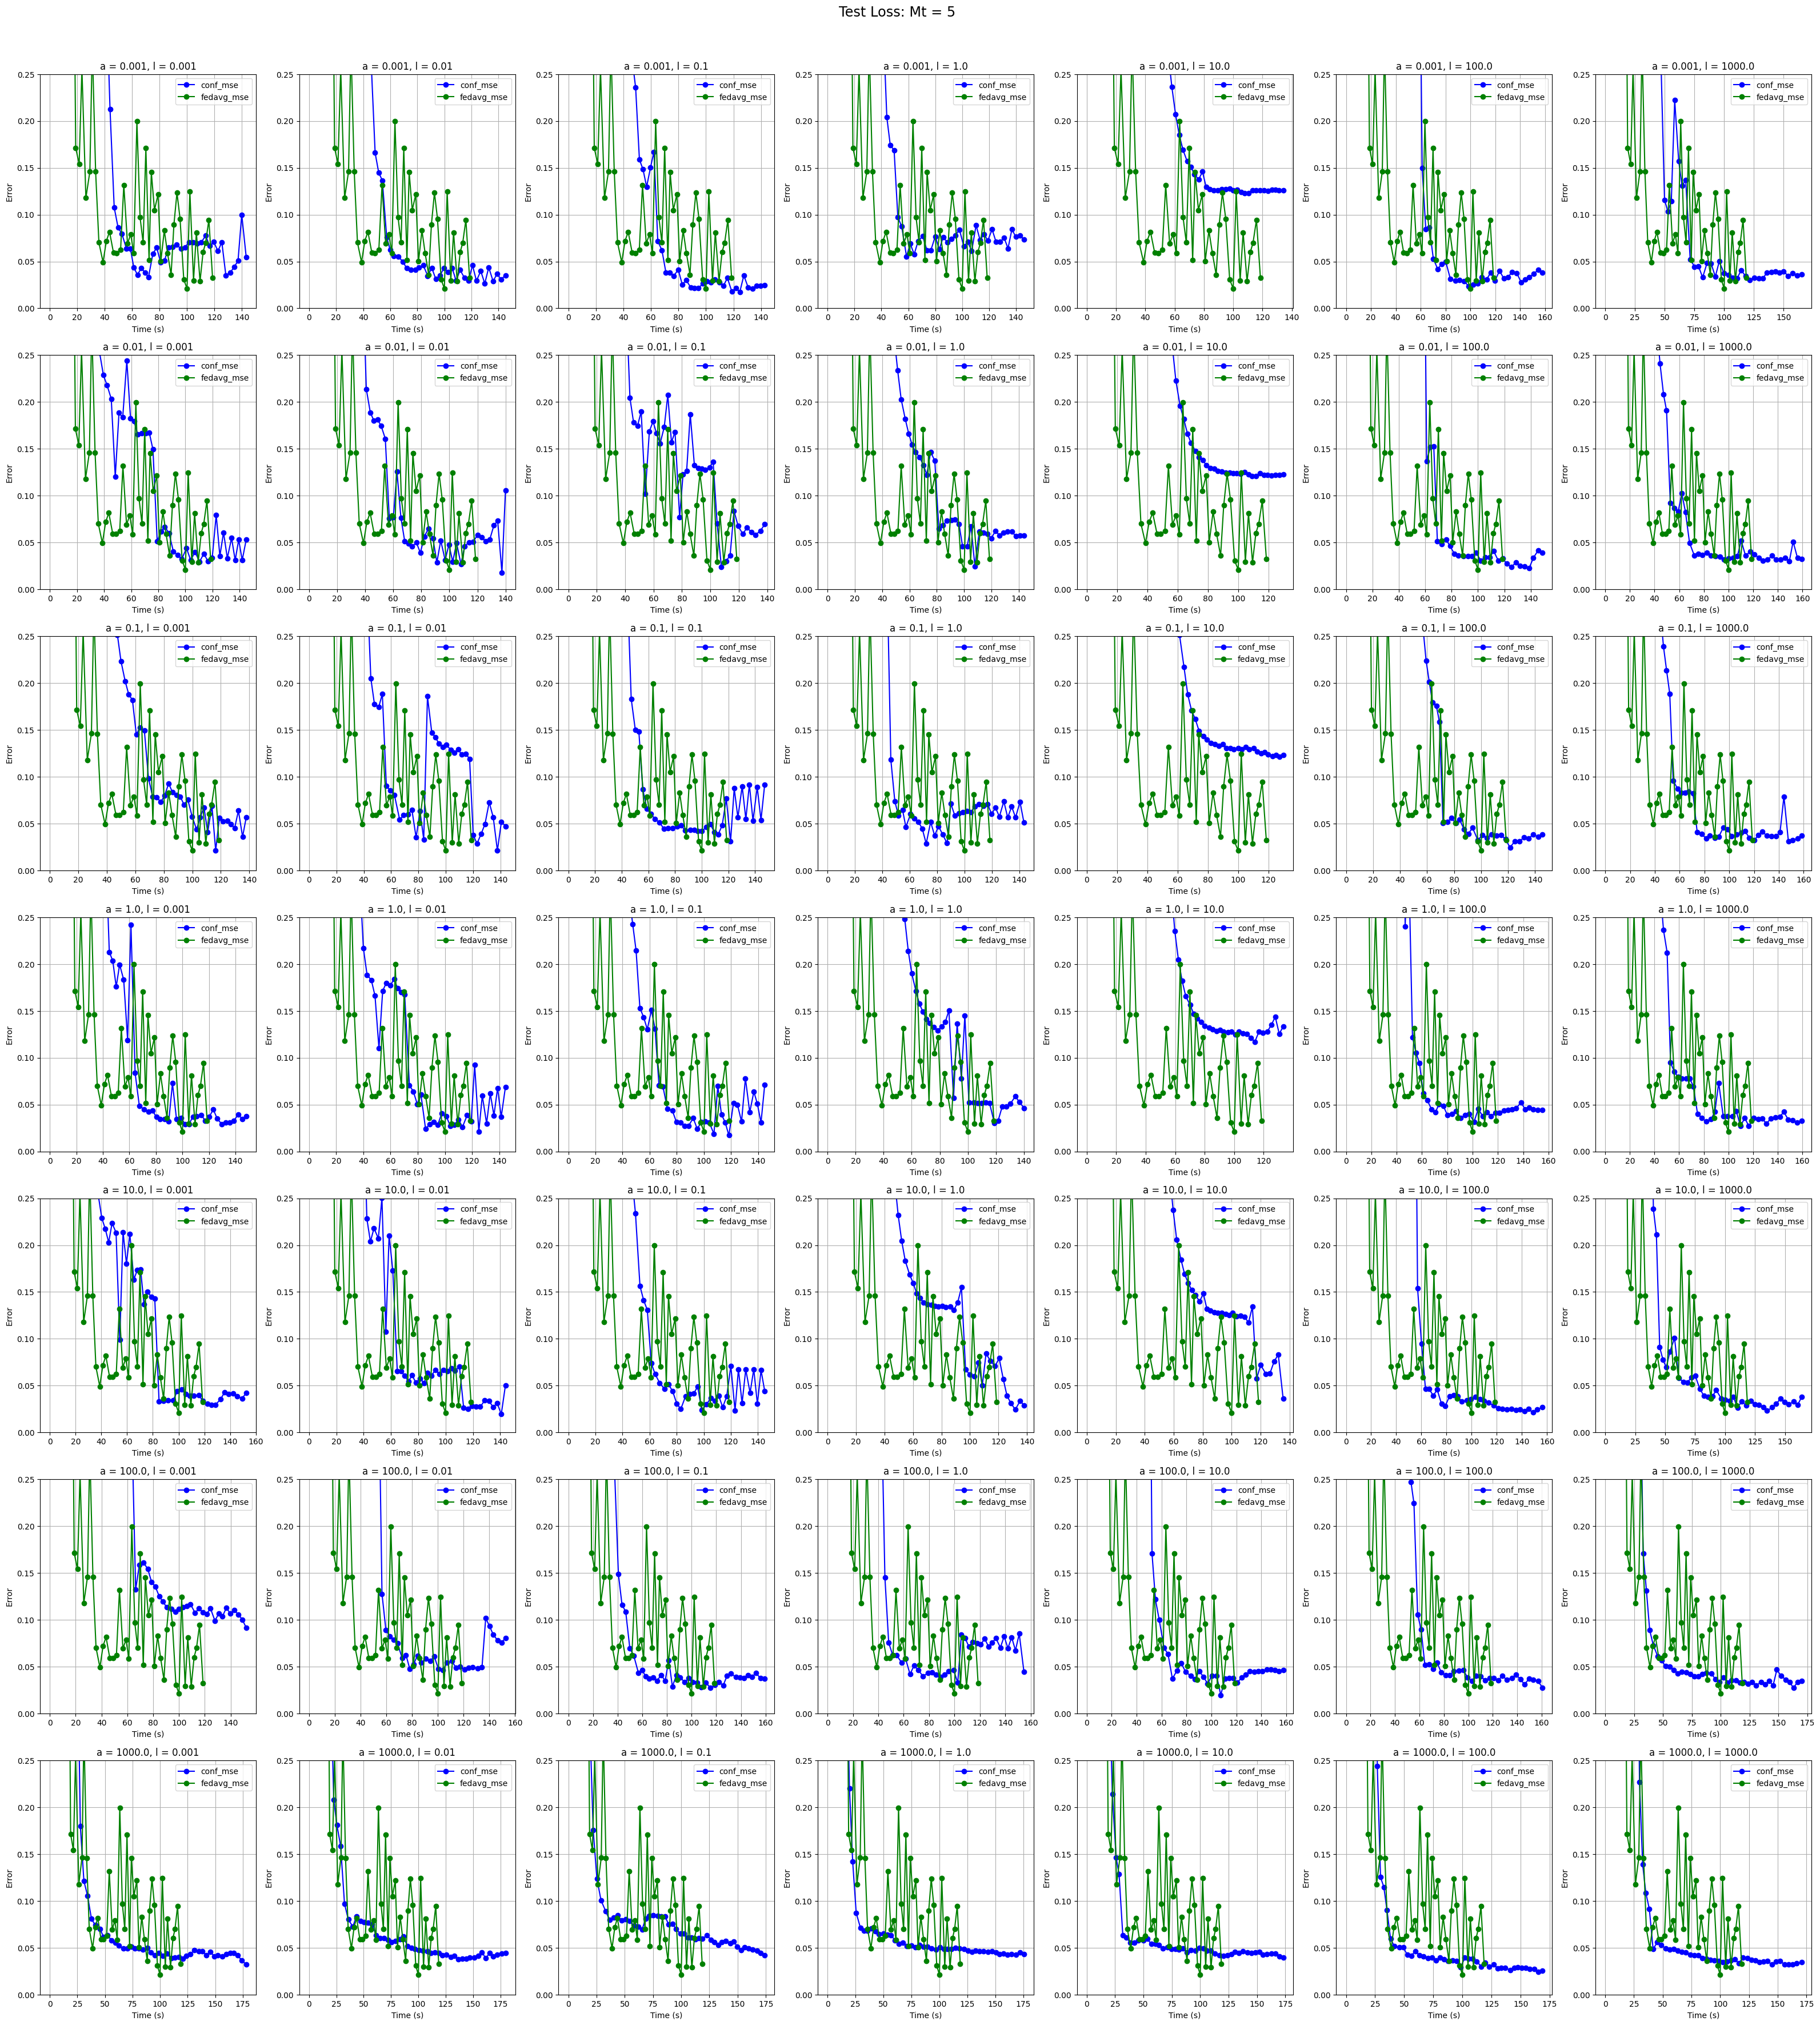

In [8]:
test.confeddi_gs_test_plots((40, 40), (0, 0.25))

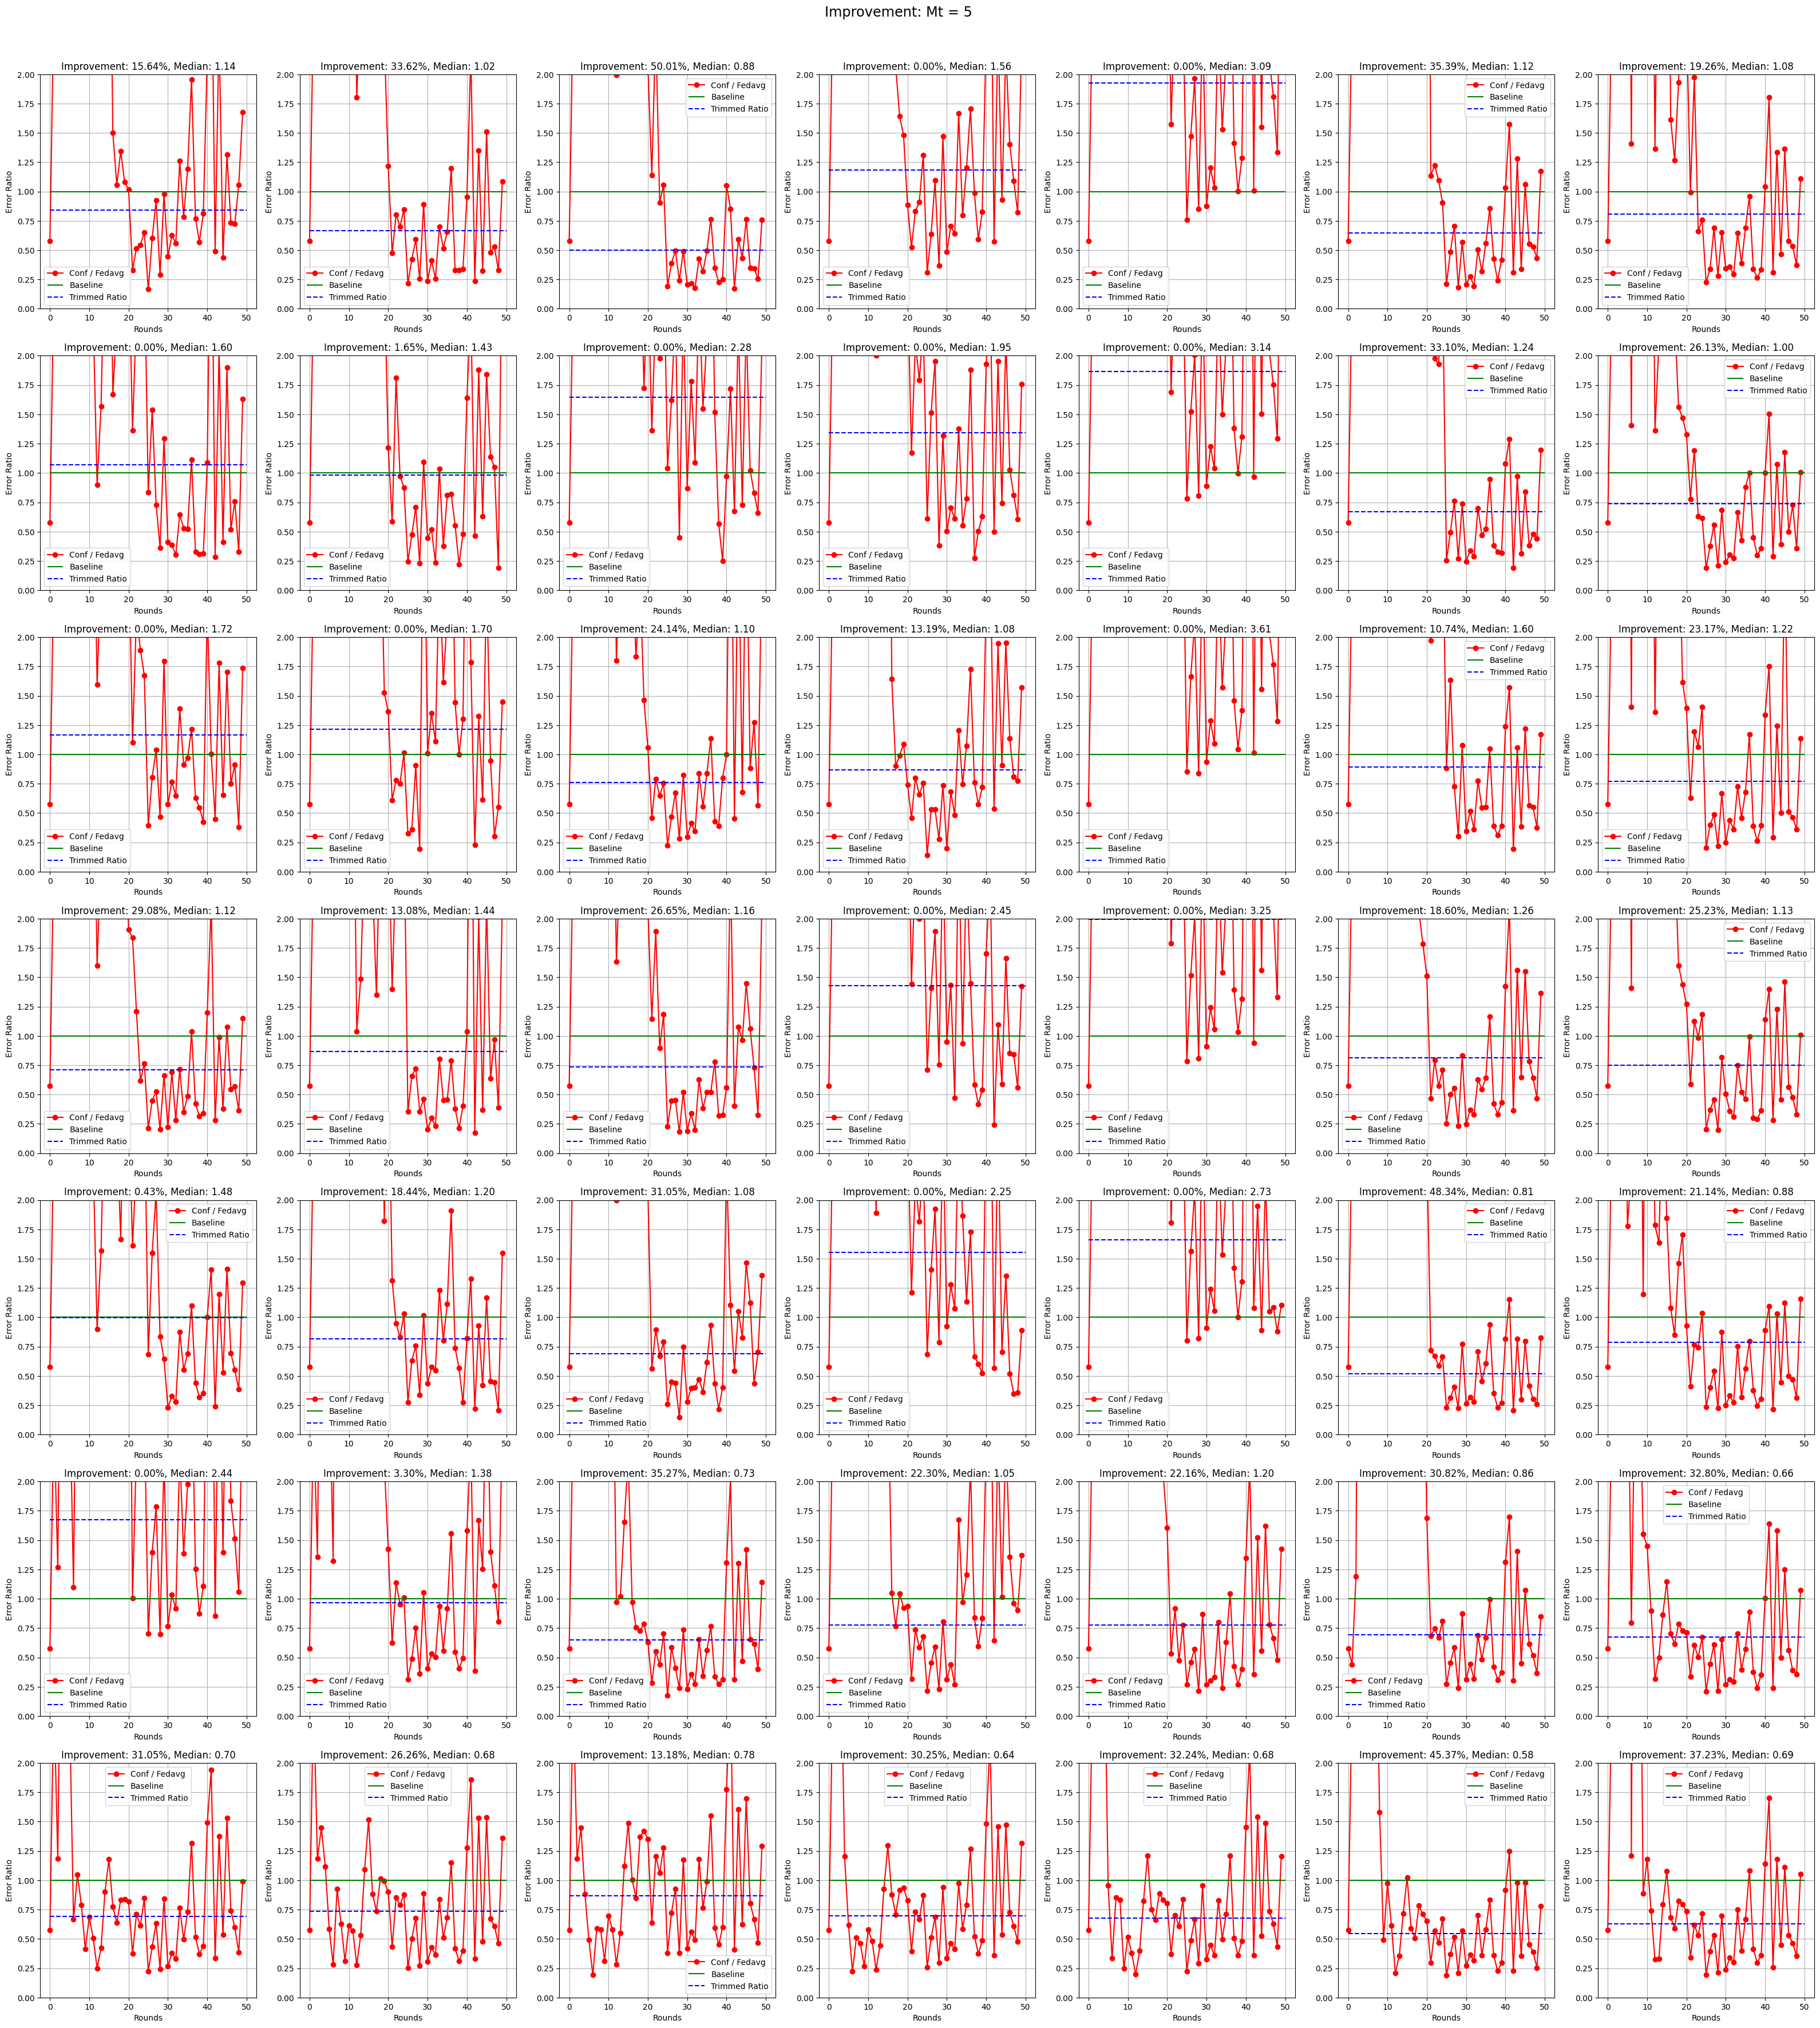

In [11]:
test.confeddi_gs_improvement_plots((40, 40), ylim = (0, 2), trim_bias = 1)

In [12]:
gs_histories = {}
fedavg_log_histories
gs_histories.append(test.conf_gs_history)

In [14]:
test.split(scheme = 2)
test.display_metadata()

Number of samples: 29581
Features per sample: 10

Columns:
%Timestamp[s], GroundTruthPositionX[m], GroundTruthPositionY[m], GroundTruthPositionZ[m], ML_range_estimate[m], AP_positionX[m], AP_positionY[m], AP_positionZ[m], AP_index, ToD_factor[m]

Clients: 12
Total Client Training Samples: 17742 (59.98%)
Total Client Training Labels: 17742
Total Validation Samples: 5921 (20.02%)
Total Validation Labels: 5921
Total Test Samples: 5918 (20.01%)
Total Test Labels: 5918


In [15]:
test.display_client_distribution()

Data Distribution
Client 1: 10.37%
Client 2: 10.20%
Client 3: 7.93%
Client 4: 8.17%
Client 5: 7.02%
Client 6: 7.50%
Client 7: 10.61%
Client 8: 9.86%
Client 9: 9.97%
Client 10: 8.98%
Client 11: 4.49%
Client 12: 4.92%

Distance Distribution w.r.t. Max Distance
Client 1: 68.42%
Client 2: 1.13%
Client 3: 84.83%
Client 4: 100.00%
Client 5: 24.36%
Client 6: 28.14%
Client 7: 58.71%
Client 8: 28.25%
Client 9: 54.60%
Client 10: 49.32%
Client 11: 42.32%
Client 12: 6.30%


In [ ]:
w, b, fedavg_test_mse, fedavg_log = test.run_fedavg_test(rounds = rounds, frac_clients = (5/12))
log_path = 'history/important baselines/fedavg_log_5_scheme2.npy'
test_path = 'history/important baselines/fedavg_test_mse_5_scheme2.npy'
np.save(log_path, fedavg_log)
np.save(test_path, fedavg_test_mse)
test.load_baseline_fedavg_data(test_path, log_path)